# load libraries

In [1]:
import os
import pandas as pd
import numpy as np


# set directory and import the data

In [2]:
os.chdir("C:/Users/sai/Desktop/python code")
os.getcwd()
data_frame = pd.read_csv("day.csv", encoding = 'ISO - 8859 -1')

In [5]:
os.getcwd()
#data_frame

'C:\\Users\\sai\\Desktop\\python code'

# Checking the data types and converting into required ones.

In [7]:
data_frame.info()
#conversion of datatypes into numerics

for columns in ['instant','temp','atemp','hum','windspeed','casual','registered','cnt']:
        data_frame[columns] = data_frame[columns].astype('float')         


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null float64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null float64
cnt           731 non-null float64
dtypes: float64(8), int64(7), object(1)
memory usage: 91.5+ KB


In [10]:
#conversion into categorical
for columns in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
        data_frame[columns] = data_frame[columns].astype('object')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null float64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null object
mnth          731 non-null object
holiday       731 non-null object
weekday       731 non-null object
workingday    731 non-null object
weathersit    731 non-null object
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null float64
cnt           731 non-null float64
dtypes: float64(8), object(8)
memory usage: 91.5+ KB


In [11]:
from datetime import datetime
data_frame['dteday'].apply(str)
data_frame['dteday'] = pd.to_datetime(data_frame['dteday'])

# Data preprocessing

In [12]:
data_frame.isnull().sum()

#there is no missing value found in dataset lets move to outlier analysis

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# outlier detection and removal

In [13]:
num_var = ["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]

for i in num_var:
    q75 , q25 = np.percentile(data_frame.loc[:,i],[75,25])
    iqr = q75  -  q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    print(min)
    print(max)
    
    data_frame = data_frame.drop(data_frame[data_frame.loc[:,i] < min].index)
    data_frame = data_frame.drop(data_frame[data_frame.loc[:,i] > max].index)


-364.0
1096.0
-0.14041600000000015
1.1329160000000003
-0.06829675000000018
1.0147412500000002
0.20468725
1.0455212500000002
-0.012431000000000025
0.380585
-885.0
2323.0
-840.0
8018.0
-788.125
9500.875


In [15]:
#after removing the entire row in which the outlier is present data has been reduced to 676 obsevartions
data_frame.shape

(676, 16)

# feature selection

In [16]:
#correlation plot for detecting insignificant numerical variables which are highly correlated
corr_plot = data_frame.loc[:,num_var]
corr_plot.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 730
Data columns (total 8 columns):
instant       676 non-null float64
temp          676 non-null float64
atemp         676 non-null float64
hum           676 non-null float64
windspeed     676 non-null float64
casual        676 non-null float64
registered    676 non-null float64
cnt           676 non-null float64
dtypes: float64(8)
memory usage: 47.5 KB


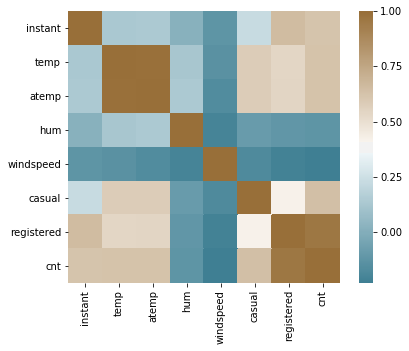

In [18]:
import seaborn as sns
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))

corr = corr_plot.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 50, as_cmap=True),square=True, ax=ax)


# dimension reduction

In [19]:
#removing the highly correlated numerical variables because they cause multicollinearity
#temp and temp are obeserved highly correlated,thus we drop one of them
#casaul,registered and cnt are also positively correlated with each other and the sum of casual and registered forms cnt(observed from the data)

data_frame = data_frame.drop(["instant","casual","registered","temp","dteday"],axis = 1)


In [20]:
data_frame.columns.values

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'], dtype=object)

# writing the processed data back to directory

In [21]:
data_frame.to_csv("processed_data.csv",sep="\t")

# Model development

In [22]:
#Regression Model
#decision Tree
from random import randrange, uniform
import sklearn

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
#data_frame
data_frame.shape

(676, 11)

# Dividing the processed data into train and test

In [35]:
x = data_frame.values[:, 0:10]
y = data_frame.values[:,10]
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

In [40]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

# predictions on test data

In [45]:
DT_Predictions = c50_model.predict(x_test)

In [47]:
DT_Predictions

array([6966, 7572,  920, 3389, 1834, 4381, 6591, 1000, 6864, 6169, 3422,
       4725, 7444, 4460, 5786, 4780, 4381, 1685, 3331, 3820, 6855, 4338,
       2913, 4968, 5409,  627, 3805, 3922, 3071, 7424, 5020, 7466, 4010,
       4362, 4602,   22, 3544, 2132, 8156, 6772, 5323, 4186, 6227, 7446,
       3784, 5729, 4570, 2417, 4067, 2802, 1526, 3926, 4186, 7421, 3372,
       4186, 7415, 4381, 3659, 5087, 3761, 1834, 3767, 4656, 7534, 2914,
       6312, 3272, 4294, 2743, 7446, 7264, 2947, 7058, 4576, 2425, 3243,
       2425, 6824, 4629, 2368, 3958, 6779, 1263, 3333, 1817, 5130, 6133,
       3784, 4308, 5713, 7697, 6192, 3855, 1917, 4608,  754, 2134, 5478,
       6031, 1349, 1167, 4665, 5805,  985, 4332,  441, 5087, 4708, 1834,
       7580, 3409, 6998, 4649, 5087, 3429, 6779, 4661, 7591, 4725, 4433,
       5740, 3005, 4648, 7736, 3333, 2423, 5298, 4648, 5918, 5409, 6606,
       5585, 4665, 5117, 6235])

# defining a RMSLE coefficient for performance evaluation

In [48]:
def rmsle(target, predicted):
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in target]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in predicted]))
    calc = (log1 - log2) **2
    return np.sqrt(np.mean(calc))


In [49]:
print("RMSLE Value :", rmsle(y_test,DT_Predictions))

RMSLE Value : 0.6164680709493867


# RandomForest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 20).fit(x_train, y_train)

In [51]:
rf_predictions = rf_model.predict(x_test)

In [52]:
rf_predictions

array([1107, 3811, 2376, 1349, 4151, 2594, 5336, 1969, 3820, 6296,  441,
       3613, 7444, 3351, 5976, 4086, 4109,  959, 2660, 3820, 4153, 3820,
       7328, 4968, 5409,  627, 5786, 2402, 2703, 4677, 5084, 4563, 5191,
       5918, 5115, 2633, 2913, 1011, 7720, 3141, 3940, 1685, 6786, 7264,
       3974, 7525, 6544, 4833, 5323, 2832, 2077, 3926, 7466, 4773, 4717,
       3907, 7286, 4109, 2633, 5375, 1107, 2121, 4790, 5336, 3959, 4046,
       7466, 4911, 2132, 3392, 7446, 5191, 3204, 5634, 4576, 2496, 1589,
       7466, 7436, 4833, 1985, 6569, 4094, 1204, 7338, 1817, 4334, 2368,
       4150, 2425, 6904, 7333, 6073,  627, 3272, 4866, 1562, 6133, 5267,
       4492,  822, 3194, 3285, 5805, 2252, 7013,  683, 6824, 4660, 3204,
       5115, 4844, 3577, 4123, 2028, 5805, 1000, 3544, 3523, 3190, 6133,
       4677, 1360, 7580, 5119, 2298, 1510, 4595, 5713, 5918, 6460, 5478,
       5729, 3784, 4120, 1865])

# Error evaluation using the above defined rmsle method

In [53]:
print("RMSLE Value: ", rmsle(y_test,rf_predictions))

RMSLE Value:  0.48906977323660406
